In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from kneed import KneeLocator

This function loads the data, print the initial data and returns datanp

In [3]:
def loadAndPlotData(file_name):
  path = './artificial/'
  name=file_name
  databrut = arff.loadarff(open(path+str(name), 'r'))
  datanp = np.array([[x[0],x[1]] for x in databrut[0]])

  print("Affichage données initiales            "+ str(name))
  f0 = datanp[:,0] # tous les élements de la première colonne
  f1 = datanp[:,1] # tous les éléments de la deuxième colonne

  plt.figure(figsize=(6, 6))
  plt.scatter(f0, f1, s=8)
  plt.title("Donnees initiales : "+ str(name))
  plt.show()
  return datanp

Affichage données initiales            xclara.arff


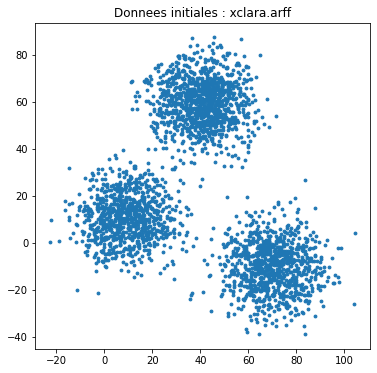

In [4]:
xcalara = loadAndPlotData("xclara.arff")

Premier appel de DBscan

Appel DBSCAN (1) ... 
Number of clusters: 25
Number of noise points: 394


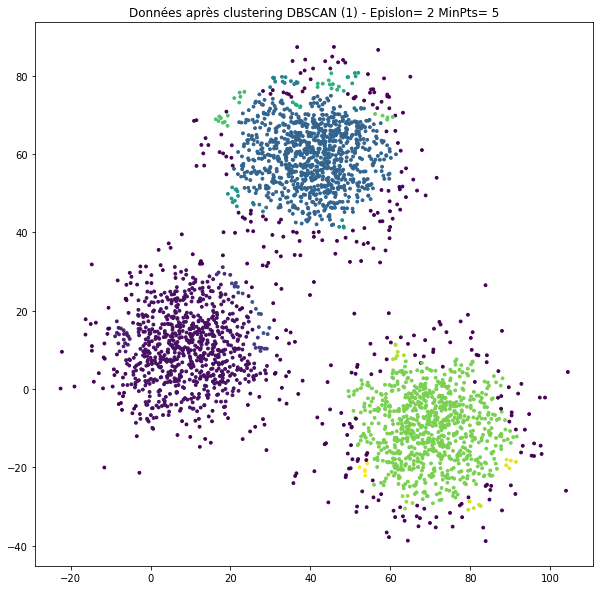

In [5]:
print("Appel DBSCAN (1) ... ")
tps1 = time.time()
epsilon=2 #2  # 4
min_pts= 5 #10   # 10
model = cluster.DBSCAN(eps=epsilon, min_samples=min_pts)
model.fit(xcalara)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)
plt.figure(figsize=(10,10))
plt.scatter(xcalara[:,0], xcalara[:,1], c=labels, s=8)
plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon)+" MinPts= "+str(min_pts))
plt.show()

Appel DBSCAN (1) ... 
Number of clusters: 6
Number of noise points: 87


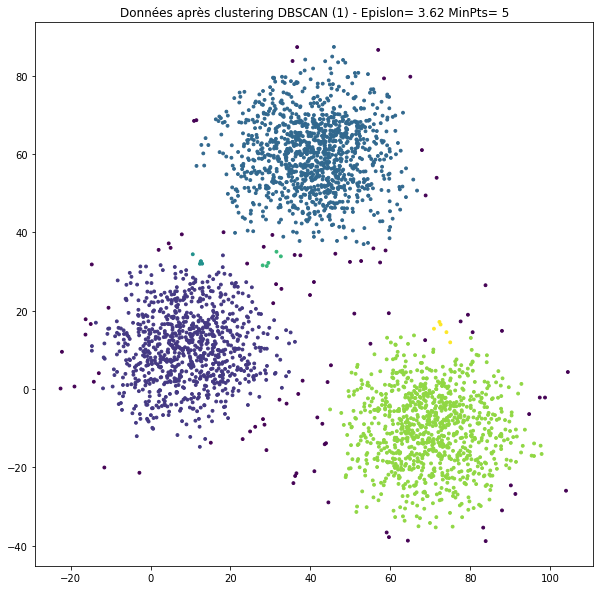

In [6]:
print("Appel DBSCAN (1) ... ")
tps1 = time.time()
epsilon=3.62 #2  # 4
min_pts= 5  # 10
model = cluster.DBSCAN(eps=epsilon, min_samples=min_pts)
model.fit(xcalara)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)
plt.figure(figsize=(10,10))
plt.scatter(xcalara[:,0], xcalara[:,1], c=labels, s=8)
plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon)+" MinPts= "+str(min_pts))
plt.show()

Après plusieurs test en jouant sur le epsilon et sur le nombre de points minimum d'un cluster; on a : epsilon = 6, nm_min = 10

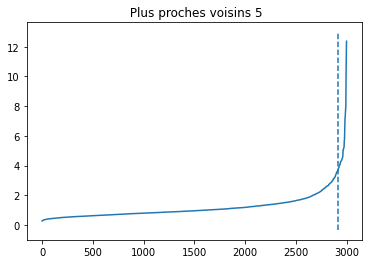

3.6296960973324133


In [7]:
# Distances aux k plus proches voisins
# Donnees dans X
k=5
neigh = NearestNeighbors(n_neighbors = k)
neigh.fit(xcalara)
distances,indices = neigh.kneighbors(xcalara)
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort(newDistances)
x_axis= list(np.arange(0,distancetrie.size,1))
plt.title( " Plus proches voisins " + str ( k ) )
plt.plot(distancetrie)
plt.vlines(KneeLocator(x_axis,distancetrie,curve="convex").knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()
print((distancetrie[KneeLocator(x_axis,distancetrie,curve="convex").knee]))

In [8]:
def plotClusteredDBSCAN(epsilon,min_pts,data):
  print("Appel DBSCAN (1) ... ")
  tps1 = time.time()
  model = cluster.DBSCAN(eps=epsilon, min_samples=min_pts)
  model.fit(data)
  tps2 = time.time()
  labels = model.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)
  print('Number of clusters: %d' % n_clusters)
  print('Number of noise points: %d' % n_noise)
  print('Computing time: %d' % round((tps2 - tps1)*1000,2))
  plt.figure(figsize=(6,6))
  plt.scatter(xcalara[:,0], xcalara[:,1], c=labels, s=8)
  plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon)+" MinPts= "+str(min_pts))
  plt.show()
  

In [9]:
def plotDistanceNeighbors(k,data):
  neigh = NearestNeighbors(n_neighbors = k)
  neigh.fit(data)
  distances,indices = neigh.kneighbors(data)
  # distance moyenne sur les k plus proches voisins
  # en retirant le point " origine "
  newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
  # trier par ordre croissant
  distancetrie = np.sort(newDistances)
  plt.figure(figsize=(8,6))
  plt.title( " Plus proches voisins " + str ( k ) )
  plt.plot(distancetrie)
  plt.show()

Appel DBSCAN (1) ... 
Number of clusters: 6
Number of noise points: 89
Computing time: 32


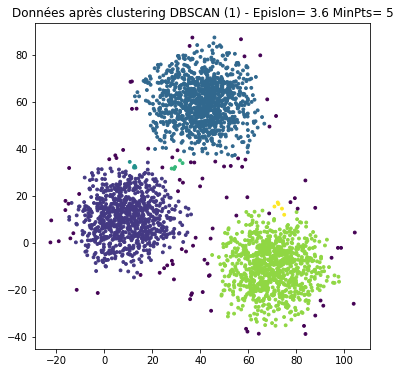

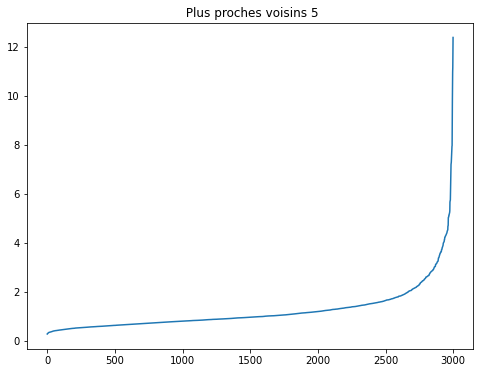

In [10]:
plotClusteredDBSCAN(3.6,5,xcalara)
plotDistanceNeighbors(5,xcalara)
#the result is not satisfying (either we need to optimize our serch of epsilon or adapt the neighbors depending on the data set)

For a coude of 3.6 not the most optimal solution (it's more an approach to estimate the interval)

In [11]:
# 2 Data sets easily clusterd : "complex9.arff", "banana.arff"
# 2 Data sets not easily clustered : "zelnik.arff", "flame.arff"

Affichage données initiales            complex9.arff


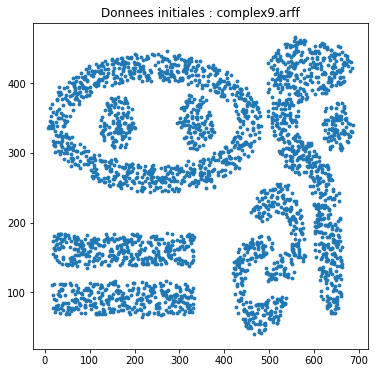

Affichage données initiales            banana.arff


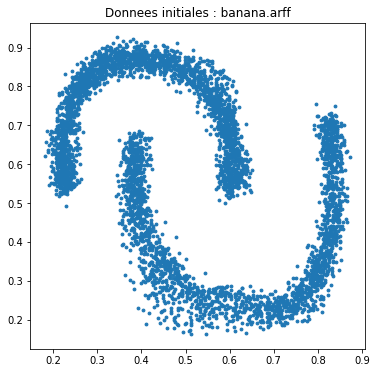

Affichage données initiales            zelnik6.arff


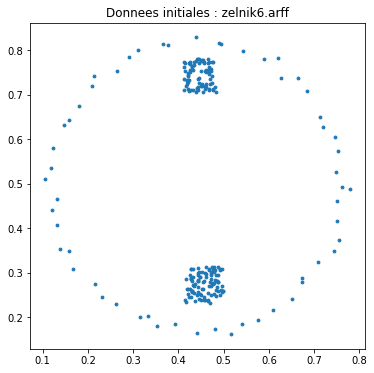

Affichage données initiales            flame.arff


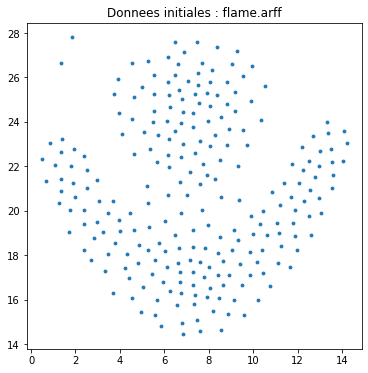

In [22]:

complex9 = loadAndPlotData("complex9.arff")
banana = loadAndPlotData("banana.arff")

zelnik = loadAndPlotData("zelnik6.arff")
flame = loadAndPlotData("flame.arff")

Affichage de la distance entre k voisins pour complex9


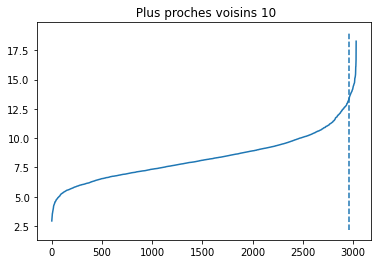

best coude for complex9 : 13.316523634103904


In [13]:
print("Affichage de la distance entre k voisins pour complex9")
# Distances aux k plus proches voisins
# Donnees dans X
k_complex=10
neigh = NearestNeighbors(n_neighbors = k_complex)
neigh.fit(complex9)
distances,indices = neigh.kneighbors(complex9)
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort(newDistances)
x_axis= list(np.arange(0,distancetrie.size,1))
plt.title( " Plus proches voisins " + str ( k_complex) )
best_coude_complex = distancetrie[KneeLocator(x_axis,distancetrie,curve="convex").knee]
plt.plot(distancetrie)
plt.vlines(KneeLocator(x_axis,distancetrie,curve="convex").knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()
print("best coude for complex9 : " + str(best_coude_complex))

Affichage de la distance entre k voisins pour banana


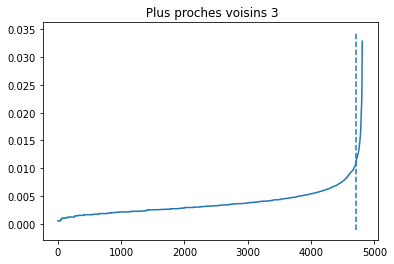

best coude for banana : 0.011248984221234788


In [14]:
print("Affichage de la distance entre k voisins pour banana")
# Distances aux k plus proches voisins
# Donnees dans X
k_banana=3
neigh = NearestNeighbors(n_neighbors = k_banana)
neigh.fit(banana)
distances,indices = neigh.kneighbors(banana)
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort(newDistances)
x_axis= list(np.arange(0,distancetrie.size,1))
plt.title( " Plus proches voisins " + str ( k_banana ) )
plt.plot(distancetrie)
best_coude_banana = distancetrie[KneeLocator(x_axis,distancetrie,curve="convex").knee]
plt.vlines(KneeLocator(x_axis,distancetrie,curve="convex").knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()
print("best coude for banana : " + str(best_coude_banana))

[13.31652363 13.53874586 13.76096808 13.9831903  14.20541252 14.42763475
 14.64985697 14.87207919 15.09430141 15.31652363]
Number of clusters: 17
Number of noise points: 64


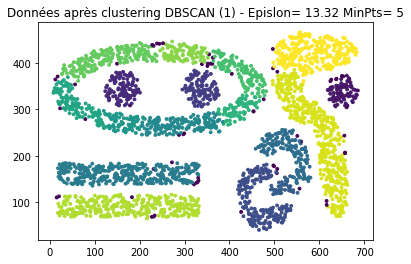

Number of clusters: 15
Number of noise points: 48


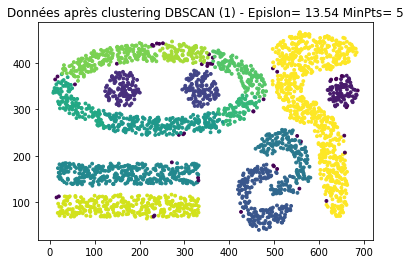

Number of clusters: 15
Number of noise points: 45


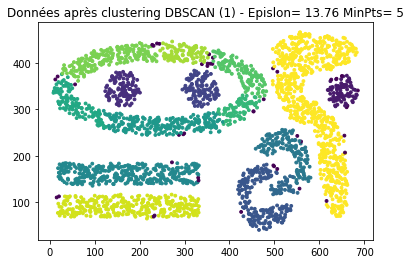

Number of clusters: 14
Number of noise points: 37


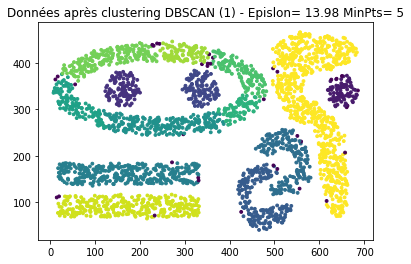

Number of clusters: 10
Number of noise points: 25


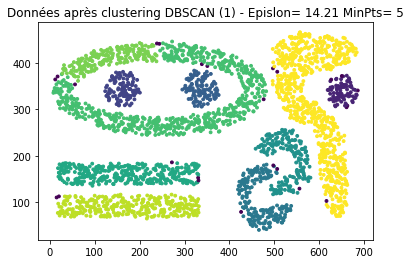

Number of clusters: 10
Number of noise points: 22


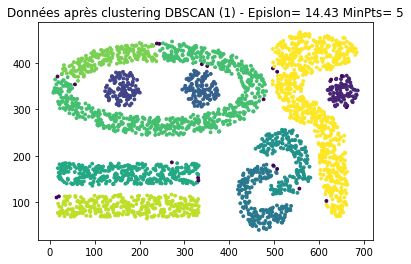

Number of clusters: 10
Number of noise points: 17


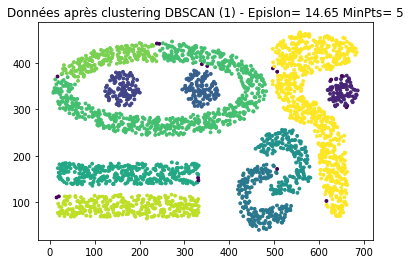

Number of clusters: 9
Number of noise points: 11


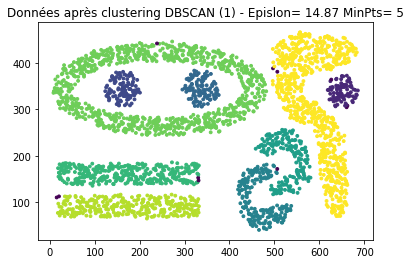

Number of clusters: 9
Number of noise points: 9


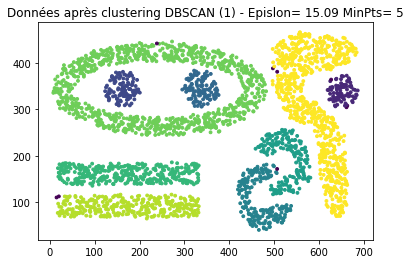

Number of clusters: 9
Number of noise points: 7


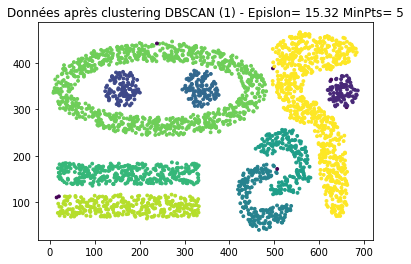

[2.050968036159012, 2.458658438701522, 2.39998929435533, 2.5771113884115078, 2.1698960727880583, 2.1359586287602452, 2.2140279968886656, 2.130966325911311, 2.1990392785789745, 2.4448240506153462]


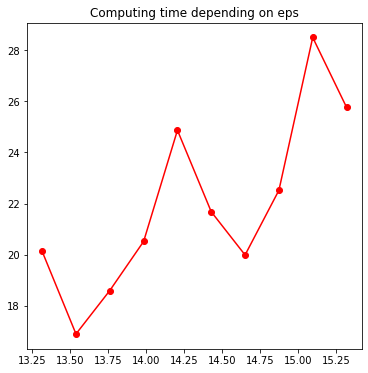

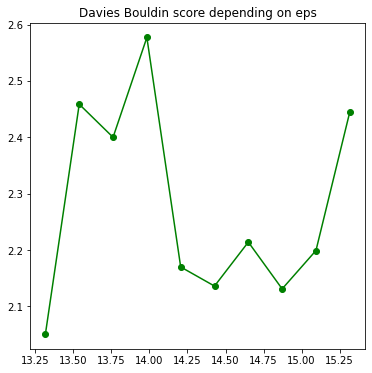

In [15]:
#Iterate over the epsilon value to find the finest parameter
epsilon_complex = np.linspace(best_coude_complex,best_coude_complex+2,10)
print(epsilon_complex)
DaviBoul_complex=[]
computing_time=[]
for e in epsilon_complex:
  tps1 = time.time()
  model = cluster.DBSCAN(eps=e, min_samples=k_complex)
  model.fit(complex9)
  tps2 = time.time()
  computing_time.append(round((tps2 - tps1)*1000,2))
  labels = model.labels_
  DaviBoul_complex.append(metrics.davies_bouldin_score(complex9,labels=labels))
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)
  print('Number of clusters: %d' % n_clusters)
  print('Number of noise points: %d' % n_noise)

  plt.scatter(complex9[:,0],complex9[:,1], c=labels, s=8)
  plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(round(e,2))+" MinPts= "+str(min_pts))
  plt.show()

print(DaviBoul_complex)
plt.figure(figsize=(6,6))
plt.title("Computing time depending on eps")
plt.plot(epsilon_complex,computing_time,'r-o')
plt.show()

plt.figure(figsize=(6,6))
plt.title("Davies Bouldin score depending on eps")
plt.plot(epsilon_complex,DaviBoul_complex,'g-o')
plt.show()



[0.21613350504646156, 0.12858999635714105, 0.12971950001310484, 0.15543795306895752, 0.019774152082008604, 0.02108764140228064, 0.0216281249519231, -0.025899814600012887, -0.025749973391785797, -0.02486934282222684]


[0.01124898 0.0223601  0.03347121 0.04458232 0.05569343 0.06680454
 0.07791565 0.08902676 0.10013787 0.11124898]
Number of clusters: 13
Number of noise points: 86


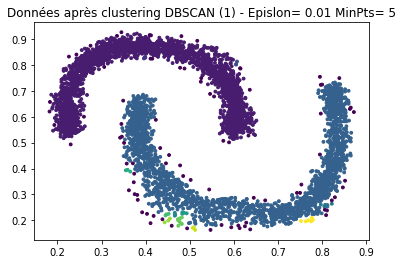

Number of clusters: 2
Number of noise points: 6


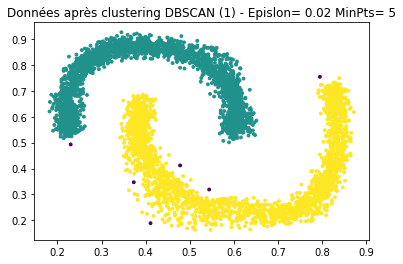

Number of clusters: 2
Number of noise points: 0


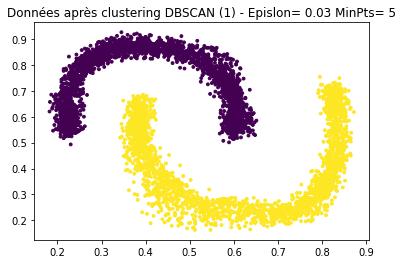

Number of clusters: 2
Number of noise points: 0


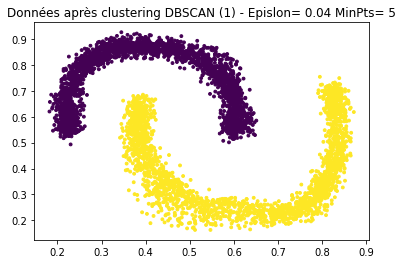

Number of clusters: 2
Number of noise points: 0


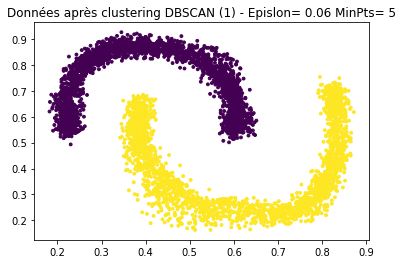

Number of clusters: 2
Number of noise points: 0


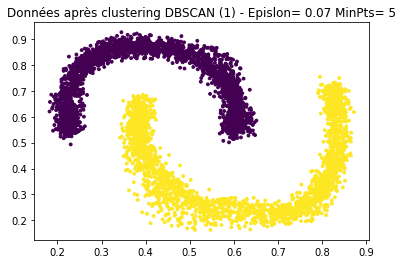

Number of clusters: 2
Number of noise points: 0


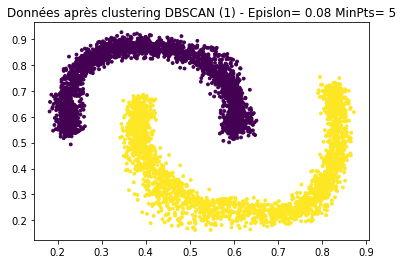

Number of clusters: 1
Number of noise points: 0


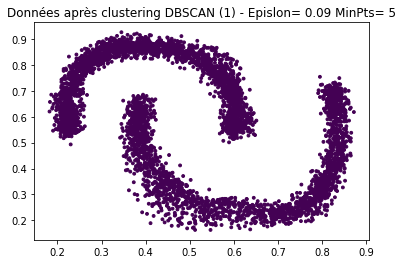

Number of clusters: 1
Number of noise points: 0


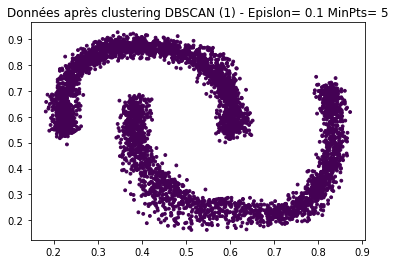

Number of clusters: 1
Number of noise points: 0


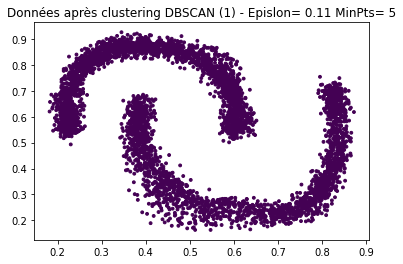

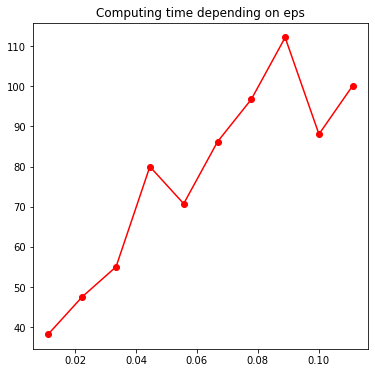

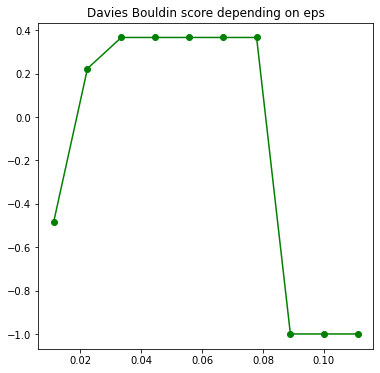

In [21]:
#Iterate over the epsilon value to find the finest parameter
epsilon_banana = np.linspace(best_coude_banana,best_coude_banana+0.1,10)
print(epsilon_banana)
DaviBoul_banana=[]
computing_time_banana=[]
for e in epsilon_banana:
  tps1 = time.time()
  model = cluster.DBSCAN(eps=e, min_samples=k_banana)
  model.fit(banana)
  tps2 = time.time()
  computing_time_banana.append(round((tps2 - tps1)*1000,2))
  labels = model.labels_
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)
  if n_clusters !=1:
    DaviBoul_banana.append(metrics.silhouette_score(banana,labels=labels))
  else:
    DaviBoul_banana.append(-1)

  print('Number of clusters: %d' % n_clusters)
  print('Number of noise points: %d' % n_noise)

  plt.scatter(banana[:,0],banana[:,1], c=labels, s=8)
  plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(round(e,2))+" MinPts= "+str(min_pts))
  plt.show()

plt.figure(figsize=(6,6))
plt.title("Computing time depending on eps")
plt.plot(epsilon_banana,computing_time_banana,'r-o')
plt.show()

plt.figure(figsize=(6,6))
plt.title("Davies Bouldin score depending on eps")
plt.plot(epsilon_banana,DaviBoul_banana,'g-o')
plt.show()

Affichage de la distance entre k voisins pour zelnik


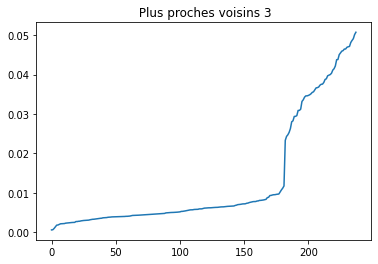

In [28]:
print("Affichage de la distance entre k voisins pour zelnik")
# Distances aux k plus proches voisins
# Donnees dans X
k_zelnik=3
neigh = NearestNeighbors(n_neighbors = k_zelnik)
neigh.fit(zelnik)
distances,indices = neigh.kneighbors(zelnik)
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort(newDistances)
x_axis= list(np.arange(0,distancetrie.size,1))
plt.title( " Plus proches voisins " + str ( k_zelnik) )
plt.plot(distancetrie)
plt.show()


The best coude value is around 0.01 (knee locator was unable of locating it because of the complexity of the curve)

Affichage de la distance entre k voisins pour complex9


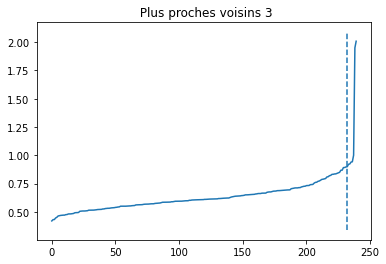

best coude for flame : 0.899


In [35]:
print("Affichage de la distance entre k voisins pour flame")
# Distances aux k plus proches voisins
# Donnees dans X
k_flame=3
neigh = NearestNeighbors(n_neighbors = k_flame)
neigh.fit(flame)
distances,indices = neigh.kneighbors(flame)
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort(newDistances)
x_axis= list(np.arange(0,distancetrie.size,1))
plt.title( " Plus proches voisins " + str (k_flame) )
plt.plot(distancetrie)
plt.vlines(KneeLocator(x_axis,distancetrie,curve="convex").knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()
print("best coude for flame : " + str(round(distancetrie[KneeLocator(x_axis,distancetrie,curve="convex").knee],3)))

Number of clusters: 2
Number of noise points: 56


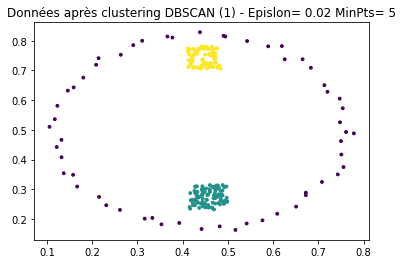

Number of clusters: 2
Number of noise points: 56


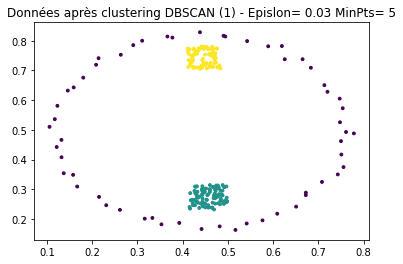

Number of clusters: 8
Number of noise points: 35


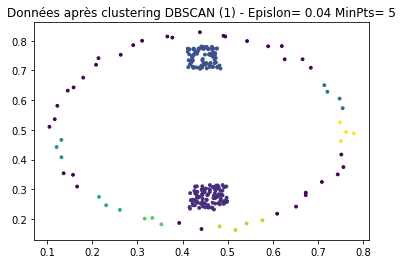

Number of clusters: 12
Number of noise points: 5


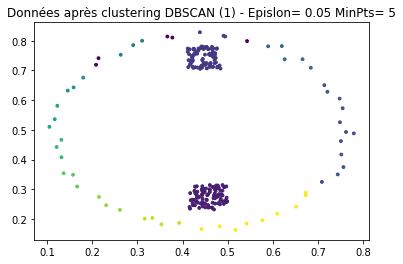

Number of clusters: 3
Number of noise points: 0


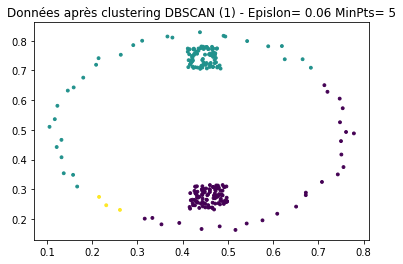

Number of clusters: 1
Number of noise points: 0


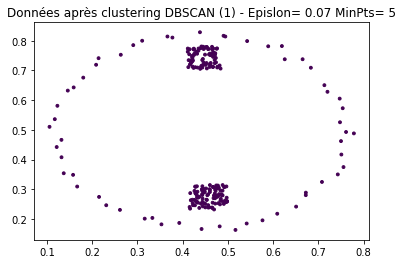

Number of clusters: 1
Number of noise points: 0


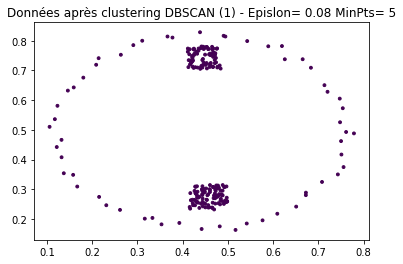

Number of clusters: 1
Number of noise points: 0


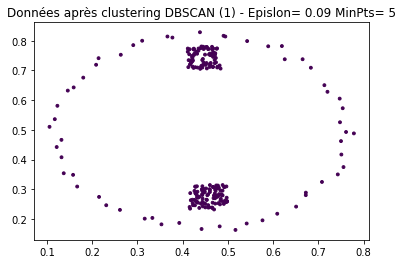

Number of clusters: 1
Number of noise points: 0


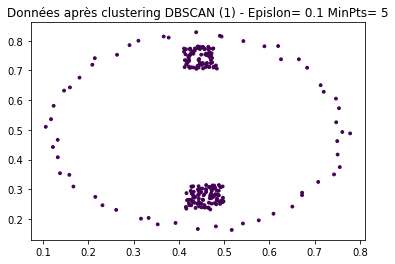

Number of clusters: 1
Number of noise points: 0


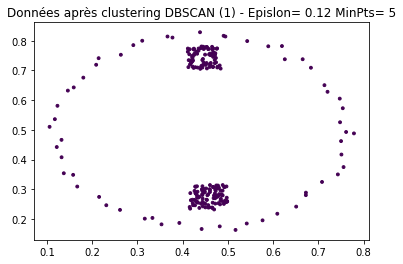

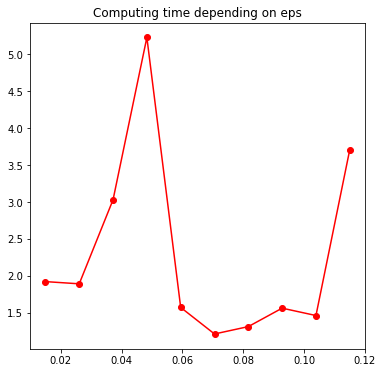

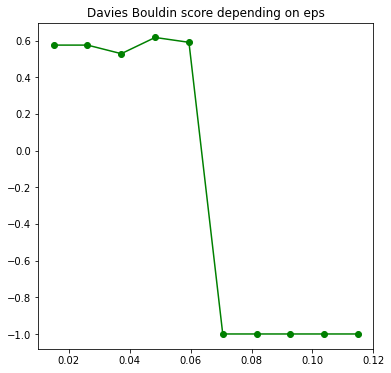

In [38]:
#Iterate over the epsilon value to find the finest parameter
epsilon_zelnik = np.linspace(0.015,0.015+0.1,10)
Silhouette_zelnik=[]
computing_time_zelnik=[]
for e in epsilon_zelnik:
  tps1 = time.time()
  model = cluster.DBSCAN(eps=e, min_samples=k_zelnik)
  model.fit(zelnik)
  tps2 = time.time()
  computing_time_zelnik.append(round((tps2 - tps1)*1000,2))
  labels = model.labels_
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)
  if n_clusters !=1:
    Silhouette_zelnik.append(metrics.silhouette_score(zelnik,labels=labels))
  else:
    Silhouette_zelnik.append(-1)

  print('Number of clusters: %d' % n_clusters)
  print('Number of noise points: %d' % n_noise)

  plt.scatter(zelnik[:,0],zelnik[:,1], c=labels, s=8)
  plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(round(e,2))+" MinPts= "+str(min_pts))
  plt.show()

plt.figure(figsize=(6,6))
plt.title("Computing time depending on eps")
plt.plot(epsilon_zelnik,computing_time_zelnik,'r-o')
plt.show()

plt.figure(figsize=(6,6))
plt.title("Davies Bouldin score depending on eps")
plt.plot(epsilon_zelnik,Silhouette_zelnik,'g-o')
plt.show()

Number of clusters: 8
Number of noise points: 50


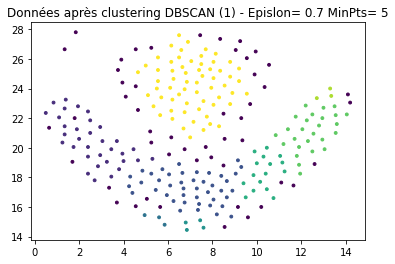

Number of clusters: 4
Number of noise points: 43


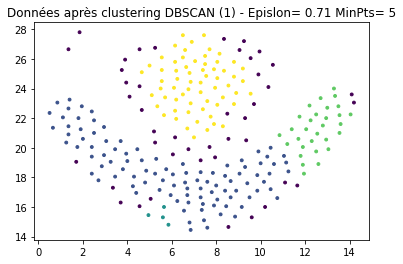

Number of clusters: 2
Number of noise points: 37


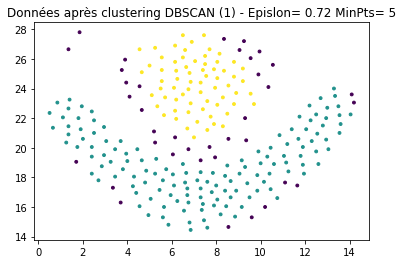

Number of clusters: 2
Number of noise points: 37


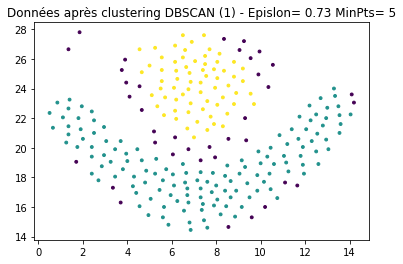

Number of clusters: 4
Number of noise points: 27


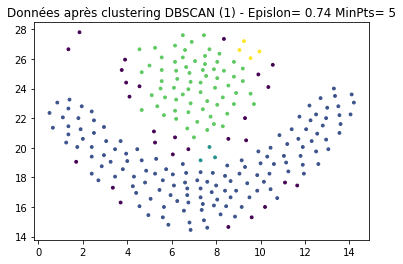

Number of clusters: 4
Number of noise points: 26


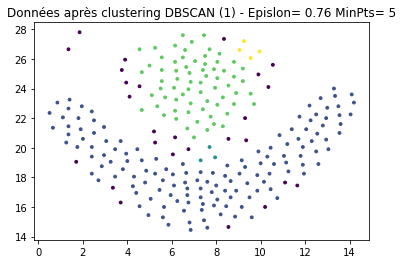

Number of clusters: 4
Number of noise points: 22


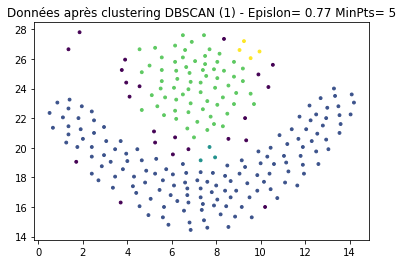

Number of clusters: 4
Number of noise points: 22


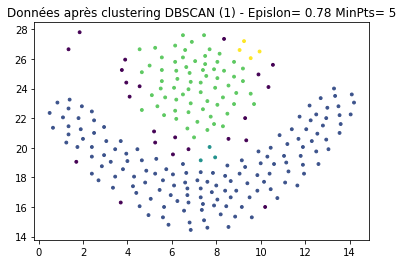

Number of clusters: 2
Number of noise points: 21


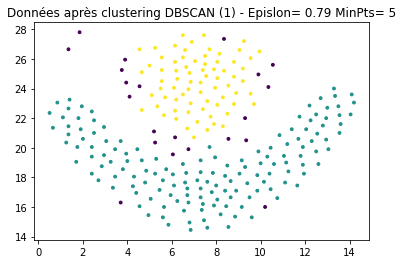

Number of clusters: 2
Number of noise points: 19


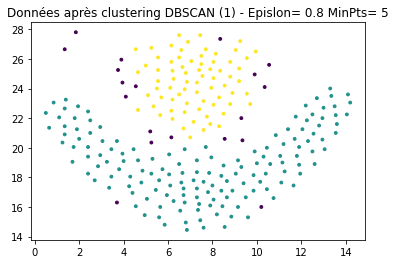

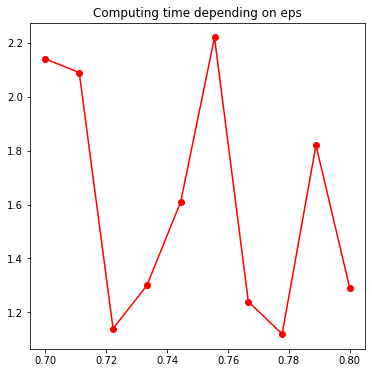

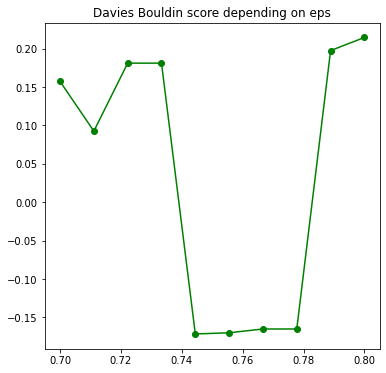

In [50]:
#Iterate over the epsilon value to find the finest parameter
epsilon_flame = np.linspace(0.7,0.8,10)
silhouette_flame=[]
computing_time_flame=[]
for e in epsilon_flame:
  tps1 = time.time()
  model = cluster.DBSCAN(eps=e, min_samples=k_flame)
  model.fit(flame)
  tps2 = time.time()
  computing_time_flame.append(round((tps2 - tps1)*1000,2))
  labels = model.labels_
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)
  if n_clusters !=1 :
    silhouette_flame.append(metrics.silhouette_score(flame,labels=labels))
  else:
    silhouette_flame.append(-1)

  print('Number of clusters: %d' % n_clusters)
  print('Number of noise points: %d' % n_noise)

  plt.scatter(flame[:,0],flame[:,1], c=labels, s=8)
  plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(round(e,2))+" MinPts= "+str(min_pts))
  plt.show()

plt.figure(figsize=(6,6))
plt.title("Computing time depending on eps")
plt.plot(epsilon_flame,computing_time_flame,'r-o')
plt.show()

plt.figure(figsize=(6,6))
plt.title("Davies Bouldin score depending on eps")
plt.plot(epsilon_flame,silhouette_flame,'g-o')
plt.show()